This notebook will facilitate the sourcing of our dataset, download into our repo. Essentially all
of the deliverables for "Data description" for Week 7 Milestone.

In [176]:
import pandas as pd
from pyprojroot import here
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt





In [149]:
#Loading in data from UCI repo
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601) 

In [150]:
# Checing data type
type(ai4i_2020_predictive_maintenance_dataset)

ucimlrepo.dotdict.dotdict

In [151]:
ai4i_2020_predictive_maintenance_dataset.items()

dict_items([('data', {'ids':         UID Product ID
0         1     M14860
1         2     L47181
2         3     L47182
3         4     L47183
4         5     L47184
...     ...        ...
9995   9996     M24855
9996   9997     H39410
9997   9998     M24857
9998   9999     H39412
9999  10000     M24859

[10000 rows x 2 columns], 'features':      Type  Air temperature  Process temperature  Rotational speed  Torque  \
0       M            298.1                308.6              1551    42.8   
1       L            298.2                308.7              1408    46.3   
2       L            298.1                308.5              1498    49.4   
3       L            298.2                308.6              1433    39.5   
4       L            298.2                308.7              1408    40.0   
...   ...              ...                  ...               ...     ...   
9995    M            298.8                308.4              1604    29.5   
9996    H            298.9              

In [152]:
# From the data structure above you can see that features and targets have seperated by keys within data by
# targets and features
X_raw = ai4i_2020_predictive_maintenance_dataset.data.features
y_raw = ai4i_2020_predictive_maintenance_dataset.data.targets
print(y_raw)

      Machine failure  TWF  HDF  PWF  OSF  RNF
0                   0    0    0    0    0    0
1                   0    0    0    0    0    0
2                   0    0    0    0    0    0
3                   0    0    0    0    0    0
4                   0    0    0    0    0    0
...               ...  ...  ...  ...  ...  ...
9995                0    0    0    0    0    0
9996                0    0    0    0    0    0
9997                0    0    0    0    0    0
9998                0    0    0    0    0    0
9999                0    0    0    0    0    0

[10000 rows x 6 columns]


In [153]:
#Merging the data according to logical structure
raw_data = pd.concat([X_raw,y_raw], axis= 1)
#saving as csv and loading into /data/raw
raw_data.to_csv(here("data/raw/ai4i2020.csv"), index= False)

In [154]:
#successful transition from ucimlrepo.dotdict.dotdict to csv to pandas DataFrame
print(raw_data.head(3))
raw_data.info()


  Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   
2    L            298.1                308.5              1498    49.4   

   Tool wear  Machine failure  TWF  HDF  PWF  OSF  RNF  
0          0                0    0    0    0    0    0  
1          3                0    0    0    0    0    0  
2          5                0    0    0    0    0    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear   

In [155]:
raw_data.shape

(10000, 12)

In [156]:
#Getting target variables
#We haven't ran any models yet but intution says we'll need Multinomial Logistic Regression
y = raw_data.loc[:,['Machine failure','TWF','HDF','PWF','OSF','RNF']]
print(y.shape)
print(y.head(5))

(10000, 6)
   Machine failure  TWF  HDF  PWF  OSF  RNF
0                0    0    0    0    0    0
1                0    0    0    0    0    0
2                0    0    0    0    0    0
3                0    0    0    0    0    0
4                0    0    0    0    0    0


In [157]:
#Getting our predictors
X = raw_data.loc[:,['Type','Air temperature','Process temperature','Rotational speed','Torque','Tool wear']]
print(X.shape)
print(X.head(5))

(10000, 6)
  Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   
2    L            298.1                308.5              1498    49.4   
3    L            298.2                308.6              1433    39.5   
4    L            298.2                308.7              1408    40.0   

   Tool wear  
0          0  
1          3  
2          5  
3          7  
4          9  


In [158]:
# Looking for missing data
print(X.isnull().sum().value_counts)
print('=======' *20)
print(y.isnull().sum().value_counts)
#confirmed clean data

<bound method IndexOpsMixin.value_counts of Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
dtype: int64>
<bound method IndexOpsMixin.value_counts of Machine failure    0
TWF                0
HDF                0
PWF                0
OSF                0
RNF                0
dtype: int64>


In [159]:
'''We still have a categoriacl value that needs to be encoded in order for us to move forward with modeling. The data cards speaks of product quality variation that is defined
as H,M,L. For substance, product quality variantion refers to the variations in the quality of a product, which can often stem from uncontrolled internal facteors or material
inconsistencies are are generally undesirable or customers. Let's try and understand the major and minor classes in this category.
'''
#This data looks ordinal L<M<H so we'll use and ordinal encoder. We'll keep order since it's important for computation.
X['Type'].value_counts()


Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [160]:
raw_data.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [161]:
oe = OrdinalEncoder(categories=[['L','M','H']],
                    dtype=int)
X['quality_variation'] = oe.fit_transform(X[['Type']])

In [162]:
print(X['quality_variation'].value_counts())

quality_variation
0    6000
1    2997
2    1003
Name: count, dtype: int64


In [163]:
X = X.drop(columns='Type')

In [164]:
#saving Ordinal encoded unscaled df to processed
encoded_unscaled_df = pd.concat([X,y], axis= 1)
#saving as csv and loading into /data/processed
encoded_unscaled_df.to_csv(here("data/processed/encoded_unscaled_df.csv"), index= False)

In [165]:
encoded_unscaled_df.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,quality_variation,Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,1,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0


In [169]:
#Dtypes
print(encoded_unscaled_df.dtypes)

Air temperature        float64
Process temperature    float64
Rotational speed         int64
Torque                 float64
Tool wear                int64
quality_variation        int64
Machine failure          int64
TWF                      int64
HDF                      int64
PWF                      int64
OSF                      int64
RNF                      int64
dtype: object


In [170]:
encoded_unscaled_df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,quality_variation,Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.500300,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.671301,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


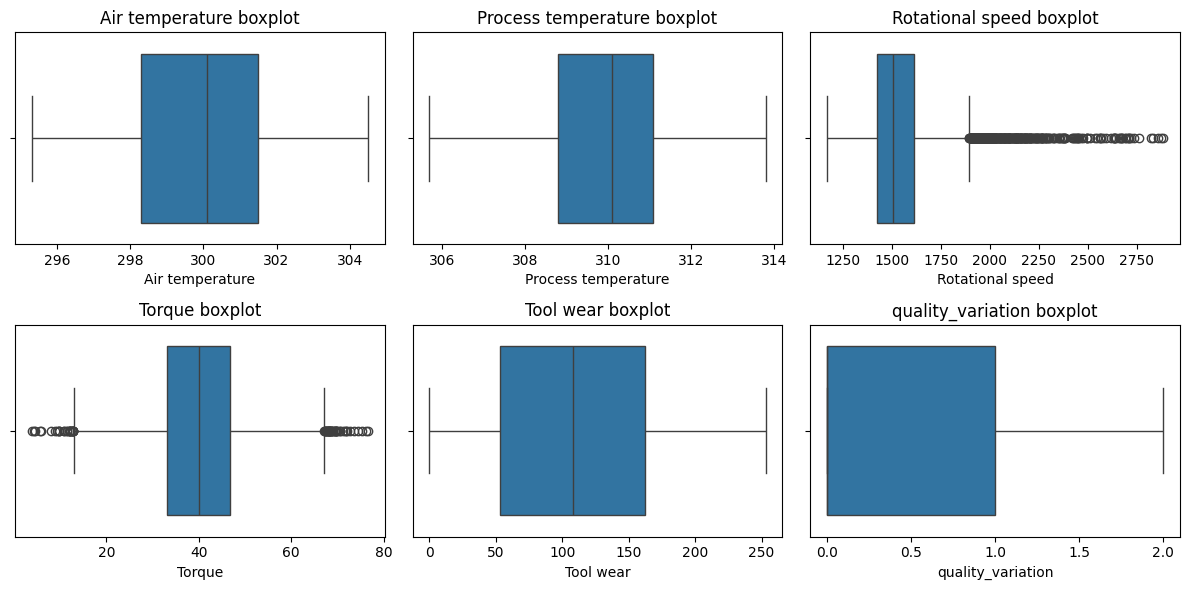

In [186]:
#Looking for outliers

cols = X.columns

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for ax, col in zip(axes.ravel(), cols):
    sns.boxplot(x=X[col], ax=ax)
    ax.set_title(f"{col} boxplot")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()
